### Test para sacar features de FFT con tsfresh y directamente por medio de numpy

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from tsfresh.feature_extraction import extract_features
import pandas as pd

#### Obtención de curva formada por tres senos

In [2]:
def sine_wave(f, a, fi, duration, sample_rate):
    t = np.arange(0, duration, 1/sample_rate)
    return a * np.sin(2 * np.pi * f * t + fi), t

In [3]:
f = np.array([100., 350, 500]) # frecuencias
a = np.array([1.5, 0.5, 1]) # amplitudes
fi = np.array([0, np.pi, np.pi/3]) # desfasamientos
s, t = sine_wave(f=f.reshape(3, 1),
                 a=a.reshape(3, 1),
                 fi=fi.reshape(3, 1),
                 duration=0.25,
                 sample_rate=10e3)

In [4]:
s = np.sum(s, axis=0)

In [5]:
matplotlib.rcParams['figure.figsize'] = [12, 8]

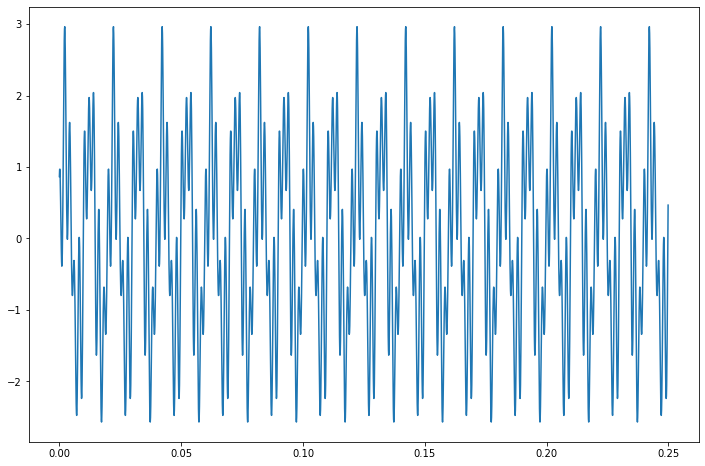

In [6]:
plt.plot(t,s)

#### obtención de fft por medio de numpy

In [7]:
S = np.fft.fft(s)
freq = np.fft.fftfreq(s.size, d=1/10e3)


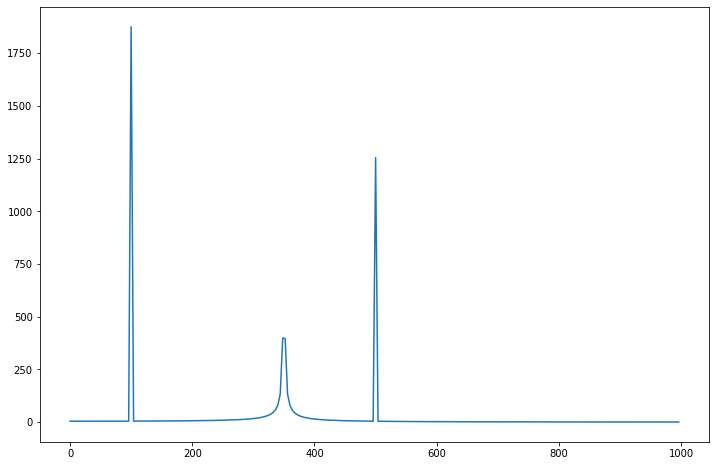

In [8]:
plt.plot(freq[:250], np.abs(S[:250]))

In [9]:
# esto tendría que calcularse en la funcion que se defina para la extracción de features en el xarray
index = np.where(np.abs(S) == np.max(np.abs(S)))[0][0]
np.angle(S)[index], np.abs(S)[index], freq[index]

(-1.5734273301861457, 1875.0064895613841, 100.0)

Como se puede ver en la grafica de la fft arriba y los valores de la celda de arriba, el máximo está en 100 Herz, lo cual corresponde con la señal que se creo en s y la fase tambien son 3/2 * pi y el valor absoluto del máximo de la FFT es 1875.
Estas son las features que podrian ser de interés

## extracción de features con tsfresh

In [12]:
pds = pd.DataFrame({'sound':s, 'id': ['a']*s.size, 'time':t })

el coeff 25 corresponde a 100 Hz de este array en particular, sin embargo eso lo sabemos desde antes. En un caso real no sabemos cual coefficiente es el maximo 

In [21]:
param = {'fft_coefficient': [{"coeff": 25, "attr": 'abs'}, {"coeff": 25, "attr": 'angle'}]}

In [22]:
extracted_feature = extract_features(pds, column_id="id", column_sort="time",
                                      default_fc_parameters=param)


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00, 1047.01it/s]


In [23]:
extracted_feature

variable,"sound__fft_coefficient__coeff_25__attr_""abs""","sound__fft_coefficient__coeff_25__attr_""angle"""
id,,
a,1875.00649,-90.150745
